# Problem statement


A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
import seaborn as sn

# Loading the dataset

In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


We can just peek into few data points by using head function of pandas. By default, head function return top 5 values 

# Data Insights

In [4]:
company.shape

(400, 11)

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


##### We could see there are no null values in our dataset.

In [6]:
dups = company.duplicated()
print('Number of duplicate rows: %d' % dups.sum())

Number of duplicate rows: 0


##### There are no duplicate values in our dataset

# Summary statistics

In [7]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Understanding the target variable

##### We are interested to know about the segment or attributes which causes high sales. The sales value is a continuous value in thousands for each location. 



In [8]:
company['Sales'].value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

# Converting the categorical variables into numerical

In [9]:
def DataFrameImputer(data):
    for col in data.columns:
        if data[col].dtype=='O':
            print(data[col])

DataFrameImputer(company)

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object
0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
395    Yes
396     No
397    Yes
398    Yes
399    Yes
Name: Urban, Length: 400, dtype: object
0      Yes
1      Yes
2      Yes
3      Yes
4       No
      ... 
395    Yes
396    Yes
397    Yes
398    Yes
399    Yes
Name: US, Length: 400, dtype: object


##### We could see that there are 3 columns ShelveLoc, Urban and US which are categorical columns. We will convert them into numerical by using Encoding techniques. There are 2 most popular encoding techniques - One Hot and Label Encoding technique.

In [10]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [11]:
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [12]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

##### We will use Label Encoding for ordinal data and One Hot Encoding for nominal data. The ShelveLoc is ordinal data as it consists of Good,Bad and Medium values so we will use Label Encoding data for it. The other two columns consists of ordinal data so we will ise One Hot Encoding technique for those two columns

In [13]:
company = pd.get_dummies(company, columns=['Urban'])
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,Urban_No,Urban_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,0,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,0,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,0,1
4,4.15,141,64,3,340,128,Bad,38,13,No,0,1


In [14]:
company = pd.get_dummies(company, columns=['US'])
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,0,1,0,1
1,11.22,111,48,16,260,83,Good,65,10,0,1,0,1
2,10.06,113,35,10,269,80,Medium,59,12,0,1,0,1
3,7.40,117,100,4,466,97,Medium,55,14,0,1,0,1
4,4.15,141,64,3,340,128,Bad,38,13,0,1,1,0


In [15]:
label_encoder = preprocessing.LabelEncoder() 
 
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,0,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,0,38,13,0,1,1,0


In [16]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_No     400 non-null    uint8  
 10  Urban_Yes    400 non-null    uint8  
 11  US_No        400 non-null    uint8  
 12  US_Yes       400 non-null    uint8  
dtypes: float64(1), int32(1), int64(7), uint8(4)
memory usage: 28.2 KB


# Data visualization

##### We will use boxplots and histograms for checking outlier data and understanding the data distribution of the features in our dataset

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CompPrice'>

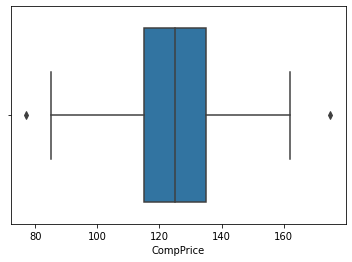

In [17]:
sn.boxplot(company['CompPrice'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice'>

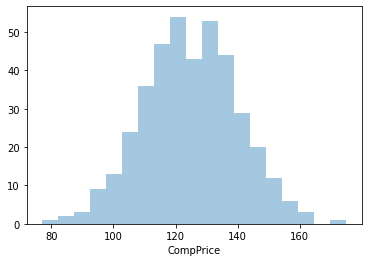

In [18]:
sn.distplot(company['CompPrice'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Income'>

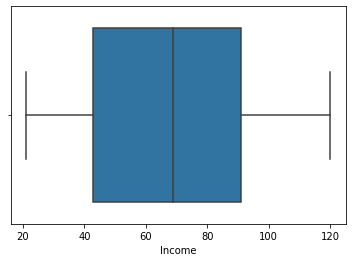

In [19]:
sn.boxplot(company['Income'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income'>

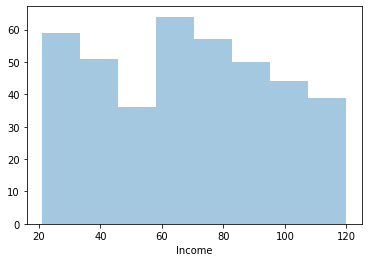

In [20]:
sn.distplot(company['Income'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Advertising'>

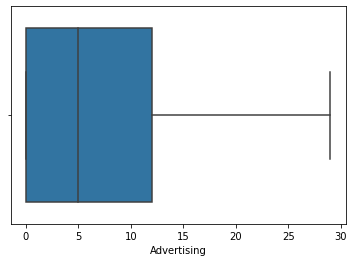

In [21]:
sn.boxplot(company['Advertising'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Advertising'>

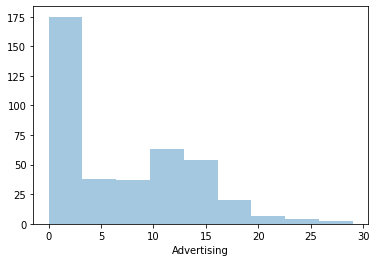

In [22]:
sn.distplot(company['Advertising'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Population'>

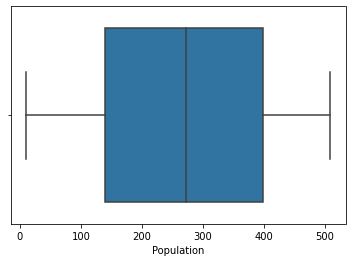

In [23]:
sn.boxplot(company['Population'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population'>

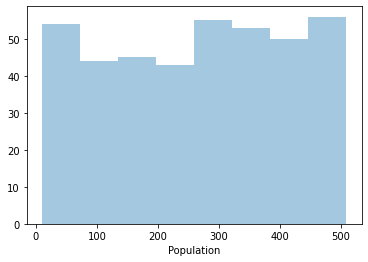

In [24]:
sn.distplot(company['Population'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price'>

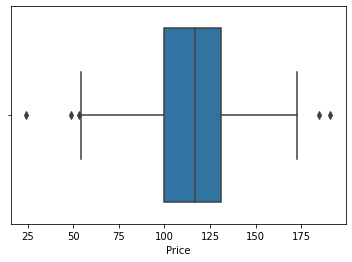

In [25]:
sn.boxplot(company['Price'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

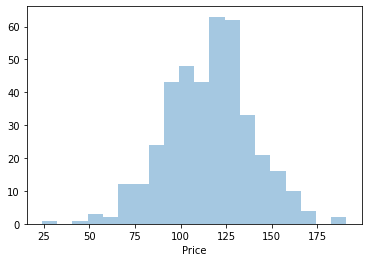

In [26]:
sn.distplot(company['Price'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

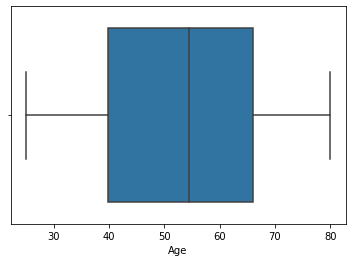

In [27]:
sn.boxplot(company['Age'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

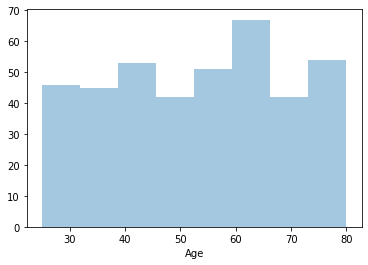

In [28]:
sn.distplot(company['Age'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Education'>

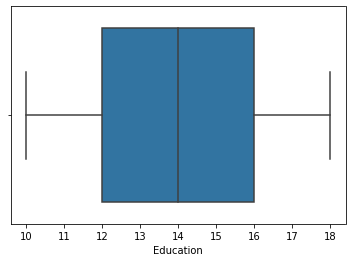

In [29]:
sn.boxplot(company['Education'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education'>

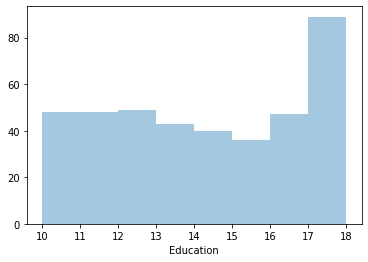

In [30]:
sn.distplot(company['Education'],kde=False)

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

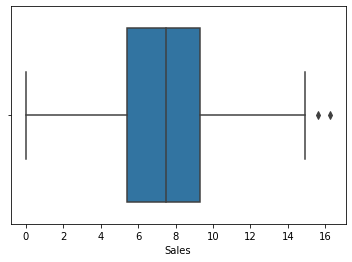

In [31]:
sn.boxplot(company['Sales'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales'>

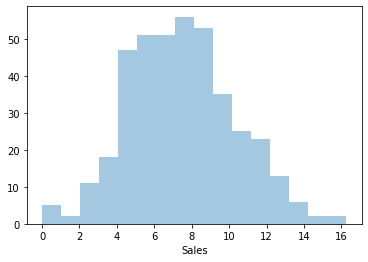

In [32]:
sn.distplot(company['Sales'],kde=False)

##### We could see from the above distplot for Sales, the values lies from 0 to 16 (in thousands) for sales. Our target variable is also sales value as we want to know about the segment or attributes that causes high sales for the cloth manufacturing company

##### We will use cut function of pandas to divide our Sales column into 3 bins and convert into categorical feature. We will specify labels as Low,Medium and High and we will specify  bins of 0,5,10 and 16 as 16 is the maximum value and 0 is the minimum value.  

##### 1.The sales values between 0 to 5 (since we are specifying right = True,the upper value will belong to same bin) will be first bin and belong to Low. 
##### 2.The sales values between 5 to 10 (since we are specifying right = True,the upper value will belong to same bin) will be second bin and belong to Medium. 
##### 3.The sales values between 10 to 16 (since we are specifying right = True,the upper value will belong to same bin) will be third bin and belong to High. 


In [33]:
company['Sales_cat'] = pd.cut(x=company['Sales'], bins=[0, 5.5, 11, 16.5], labels=['Low','Medium','High'], right=False)
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,0,1,0,1,Medium
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1,High
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1,Medium
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1,Medium
4,4.15,141,64,3,340,128,0,38,13,0,1,1,0,Low


In [34]:
company['Sales_cat'].value_counts()

Medium    248
Low       103
High       49
Name: Sales_cat, dtype: int64

# Separating feature data and Label data  and train-test split

In [35]:
X = company.drop('Sales',axis=1,inplace=True)

In [36]:
X = company.drop('Sales_cat',axis=1)
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,0,42,17,0,1,0,1
1,111,48,16,260,83,1,65,10,0,1,0,1
2,113,35,10,269,80,2,59,12,0,1,0,1
3,117,100,4,466,97,2,55,14,0,1,0,1
4,141,64,3,340,128,0,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,1,0,1
396,139,23,3,37,120,2,55,11,1,0,0,1
397,162,26,12,368,159,2,40,18,0,1,0,1
398,100,79,7,284,95,0,50,12,0,1,0,1


In [37]:
Y = company['Sales_cat']
Y.isnull().sum()

0

In [38]:
company[company['Sales_cat'].isnull()].index.tolist()

[]

In [39]:
company.iloc[174:175,:]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,Sales_cat
174,139,24,0,358,185,2,79,15,1,0,1,0,Low


In [40]:
company.iloc[376:377,:]

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,Sales_cat
376,141,60,19,319,92,1,44,11,0,1,0,1,High


In [41]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=30)

In [42]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
313,103,81,3,491,54,2,66,13,0,1,1,0
21,134,29,12,239,109,1,62,18,1,0,0,1
222,136,119,6,178,145,2,35,13,0,1,0,1
350,111,101,17,266,91,2,63,17,1,0,0,1
398,100,79,7,284,95,0,50,12,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
309,131,111,13,33,80,0,68,18,0,1,0,1
386,152,116,0,170,160,2,39,16,0,1,1,0
140,133,60,10,277,129,2,45,18,0,1,0,1
301,99,93,0,198,87,2,57,16,0,1,0,1


In [43]:
X_train.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban_No       0
Urban_Yes      0
US_No          0
US_Yes         0
dtype: int64

In [44]:
Y_train.isnull().sum()

0

In [45]:
Y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales_cat, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

# Building Decision Tree classifier using Entropy criteria

In [46]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Predicting on train data set 

In [47]:
preds_train_dt = model.predict(X_train) 
pd.Series(preds_train_dt).value_counts()

Medium    245
Low        62
High       13
dtype: int64

In [48]:
pd.crosstab(Y_train,preds_train_dt)

col_0,High,Low,Medium
Sales_cat,,,
Low,0,45,40
Medium,0,17,175
High,13,0,30


### Predicting on test data set 

In [49]:
preds_dt = model.predict(X_test) 
pd.Series(preds_dt).value_counts()

Medium    63
Low       11
High       6
dtype: int64

In [50]:
pd.crosstab(Y_test,preds_dt)

col_0,High,Low,Medium
Sales_cat,,,
Low,0,8,10
Medium,3,3,50
High,3,0,3


### Checking test accuracy

In [51]:
accuracy = accuracy_score(Y_test,preds_dt)
print(accuracy)

0.7625


### Checking train accuracy

In [52]:
accuracy = accuracy_score(Y_train,preds_train_dt)
print(accuracy)

0.728125


##### If we compare the train and test accuracy, we don't have much difference so there is no overfitting problem in our model

In [53]:
print(classification_report(Y_test,preds_dt))

              precision    recall  f1-score   support

        High       0.50      0.50      0.50         6
         Low       0.73      0.44      0.55        18
      Medium       0.79      0.89      0.84        56

    accuracy                           0.76        80
   macro avg       0.67      0.61      0.63        80
weighted avg       0.76      0.76      0.75        80



[Text(657.6428571428571, 587.0880000000001, 'X[5] <= 0.5\nentropy = 1.339\nsamples = 320\nvalue = [43, 85, 192]'),
 Text(358.7142857142857, 456.624, 'X[4] <= 102.5\nentropy = 1.131\nsamples = 83\nvalue = [2, 45, 36]'),
 Text(191.31428571428572, 326.1600000000001, 'X[1] <= 76.5\nentropy = 1.006\nsamples = 29\nvalue = [2, 5, 22]'),
 Text(95.65714285714286, 195.69600000000003, 'X[6] <= 49.5\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(47.82857142857143, 65.23200000000008, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 7]'),
 Text(143.4857142857143, 65.23200000000008, 'entropy = 0.954\nsamples = 8\nvalue = [0, 5, 3]'),
 Text(286.9714285714286, 195.69600000000003, 'X[0] <= 124.5\nentropy = 0.592\nsamples = 14\nvalue = [2, 0, 12]'),
 Text(239.14285714285714, 65.23200000000008, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]'),
 Text(334.8, 65.23200000000008, 'entropy = 0.971\nsamples = 5\nvalue = [2, 0, 3]'),
 Text(526.1142857142858, 326.1600000000001, 'X[6] <= 61.5\nentropy = 0.8

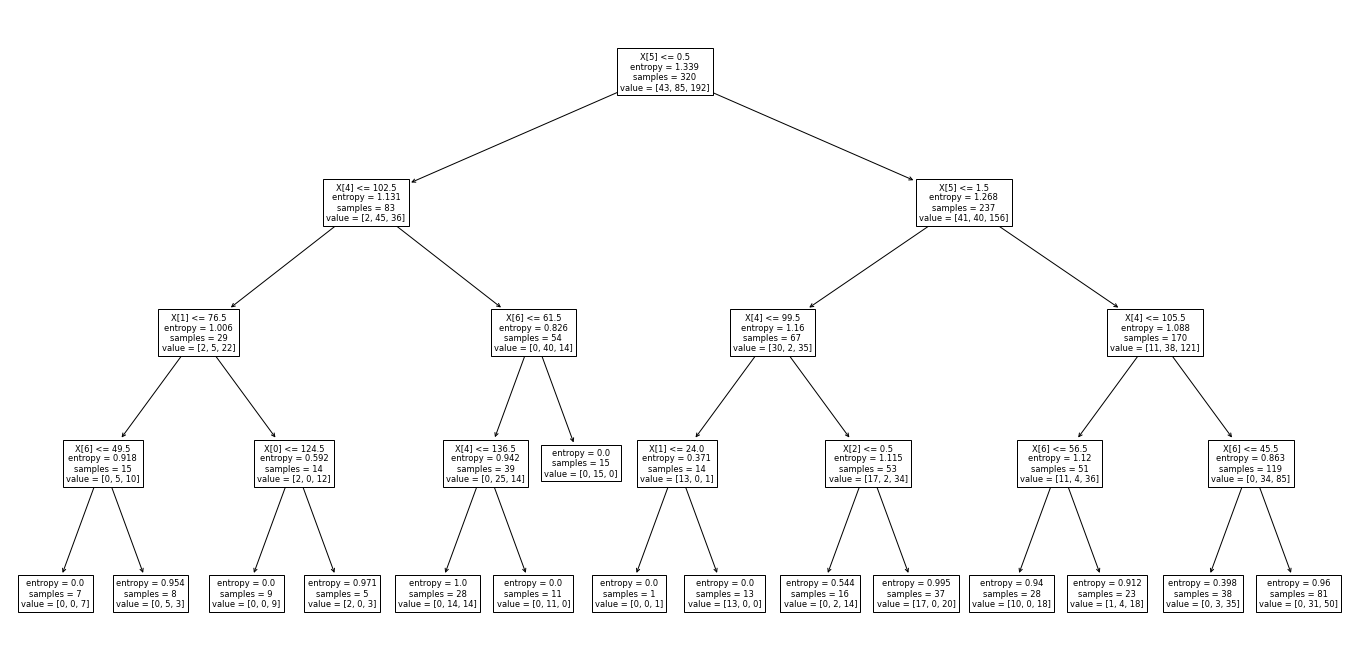

In [54]:
plt.figure(figsize=(24,12))
tree.plot_tree(model)

In [ ]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['High', 'Low', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=800)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn, filled = True,fontsize =4)

[Text(3653.571428571429, 6523.2, 'ShelveLoc <= 0.5\nentropy = 1.339\nsamples = 320\nvalue = [43, 85, 192]\nclass = Medium'),
 Text(1992.857142857143, 5073.6, 'Price <= 102.5\nentropy = 1.131\nsamples = 83\nvalue = [2, 45, 36]\nclass = Low'),
 Text(1062.857142857143, 3624.0, 'Income <= 76.5\nentropy = 1.006\nsamples = 29\nvalue = [2, 5, 22]\nclass = Medium'),
 Text(531.4285714285714, 2174.4000000000005, 'Age <= 49.5\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = Medium'),
 Text(265.7142857142857, 724.8000000000002, 'entropy = 0.0\nsamples = 7\nvalue = [0, 0, 7]\nclass = Medium'),
 Text(797.1428571428571, 724.8000000000002, 'entropy = 0.954\nsamples = 8\nvalue = [0, 5, 3]\nclass = Low'),
 Text(1594.2857142857142, 2174.4000000000005, 'CompPrice <= 124.5\nentropy = 0.592\nsamples = 14\nvalue = [2, 0, 12]\nclass = Medium'),
 Text(1328.5714285714287, 724.8000000000002, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 9]\nclass = Medium'),
 Text(1860.0, 724.8000000000002, 'entropy = 0

# Using Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_new = RandomForestClassifier(n_estimators=250,max_depth=10,min_samples_split=20,criterion='entropy')  # n_estimators is the number of decision trees
forest_new.fit(X_train, Y_train)

In [ ]:
pred_rf_train = forest_new.predict(X_train) # predicting on train data set 
pd.Series(pred_rf_train).value_counts()

In [ ]:
pred_rf_train.shape

In [ ]:
X_train.shape

In [ ]:
pd.crosstab(Y_train,pred_rf_train)

In [ ]:
pred_rf = forest_new.predict(X_test) # predicting on test data set 
pd.Series(pred_rf).value_counts()

In [ ]:
pd.crosstab(Y_test,pred_rf)

In [ ]:
accuracy = accuracy_score(Y_test,pred_rf)
print(accuracy)

In [ ]:
accuracy_train = accuracy_score(Y_train,pred_rf_train)
print(accuracy_train)

In [ ]:
print(classification_report(Y_test,pred_rf))

In [ ]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['High', 'Low', 'Medium']

estimator = forest_new.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = fn,
                class_names = cn,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
fig.savefig('rf_5trees.png')



# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'rf_5trees.png')

# Using XGBoost classifier 

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=4,n_estimators=200)
xgb_model.fit(X_train, Y_train)

# make predictions for test data
y_pred_xgb = xgb_model.predict(X_test)



accuracy = accuracy_score(Y_test,y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

##### From the above decision tree and Random forest tree we can conclude that Shelf Location is the most important attribute for causing higher sales. 